In [1]:
#importing necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
os.getcwd()

'C:\\Users\\Serg\\Untitled Folder'

In [3]:
os.chdir(r"C:\Users\Serg\Desktop\Python")

In [4]:
#Merging 12 months of data in a single file
files = [file for file in os.listdir(".\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(".\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/" + file)
    all_data = pd.concat([all_data,df])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.describe()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [7]:
#cleaning up data
all_data = all_data.dropna(how="all")



# What month is most profitable?

In [8]:
all_data["Month"] = all_data["Order Date"].str[0:2].astype("int")

ValueError: invalid literal for int() with base 10: 'Or'

In [9]:
all_data[all_data["Order Date"].str[0:2] == "Or"].head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [11]:
all_data["Month"] = all_data["Order Date"].str[0:2].astype("int")

In [12]:
#add sales column
all_data["Sales"] = all_data["Quantity Ordered"].astype("int") * all_data["Price Each"].astype("float")

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
by_month = all_data.groupby("Month",as_index = False).sum()

In [15]:
by_month.head()


,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75


Text(0.5, 0, 'Month number')

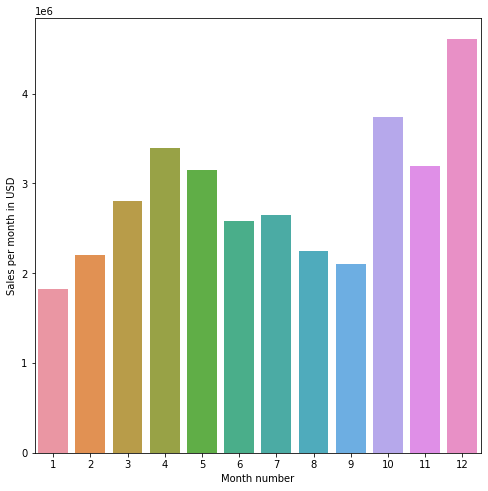

In [16]:
plt.figure(figsize = (8,8))
sns.barplot(x = by_month["Month"],y= by_month["Sales"])

plt.ylabel("Sales per month in USD")
plt.xlabel("Month number")



# What city is most profitable?

In [17]:
#adding city column
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [18]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split()[0]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
by_city = all_data.groupby("City",as_index = False).sum().sort_values("Sales")

In [21]:
by_city

,City,Month,Sales
6,Portland (ME),17144,449758.27
1,Austin (TX),69829,1819581.75
7,Portland (OR),70621,1870732.34
9,Seattle (WA),104941,2747755.48
3,Dallas (TX),104620,2767975.40
0,Atlanta (GA),104794,2795498.58
2,Boston (MA),141112,3661642.01
5,New York City (NY),175741,4664317.43
4,Los Angeles (CA),208325,5452570.80
8,San Francisco (CA),315520,8262203.91


<AxesSubplot:xlabel='City', ylabel='Sales'>

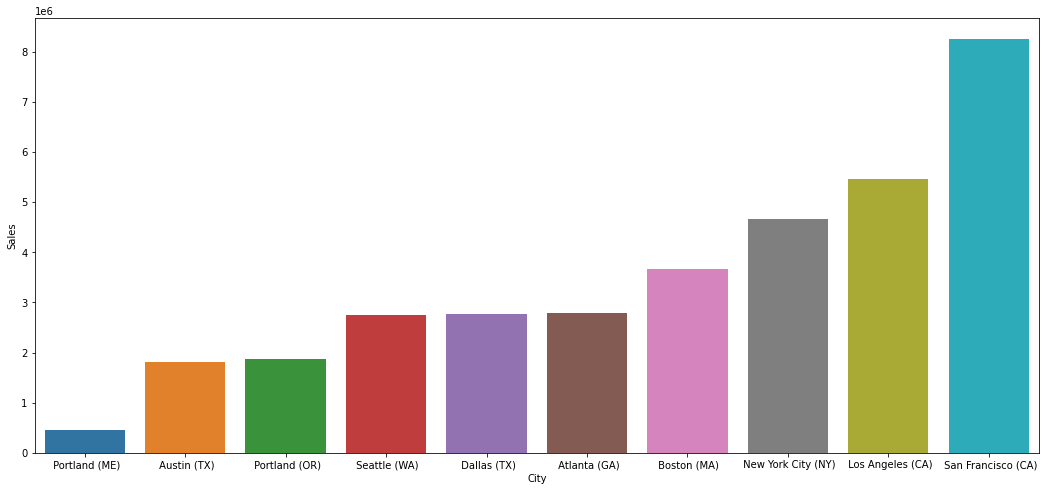

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(x = by_city["City"], y = by_city["Sales"])


In [23]:
x = by_city.loc[:, ['Sales']]
by_city['price_z'] = (x - x.mean()) / x.std()

In [24]:
by_city

,City,Month,Sales,price_z
6,Portland (ME),17144,449758.27,-1.35
1,Austin (TX),69829,1819581.75,-0.74
7,Portland (OR),70621,1870732.34,-0.71
9,Seattle (WA),104941,2747755.48,-0.32
3,Dallas (TX),104620,2767975.40,-0.31
0,Atlanta (GA),104794,2795498.58,-0.29
2,Boston (MA),141112,3661642.01,0.10
5,New York City (NY),175741,4664317.43,0.55
4,Los Angeles (CA),208325,5452570.80,0.90
8,San Francisco (CA),315520,8262203.91,2.17


# How are cities perfoming in relation to each other?

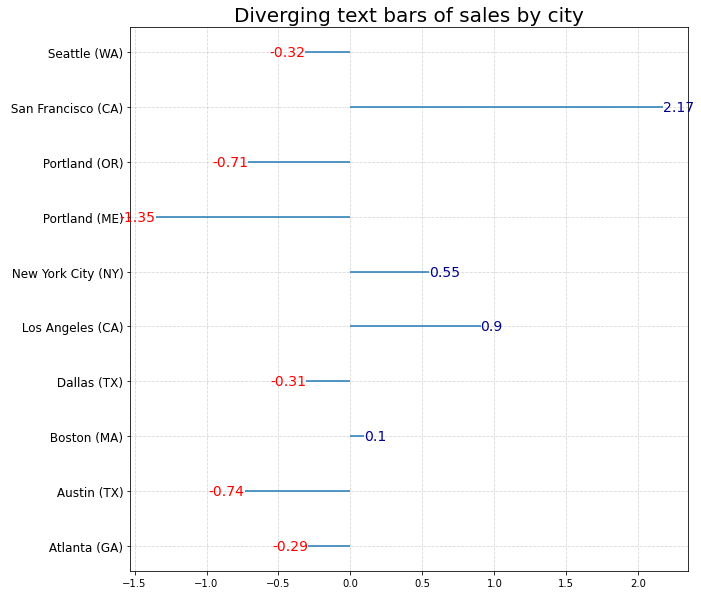

In [25]:
plt.figure(figsize=(10, 10))
plt.hlines(y=by_city.index, xmin=0, xmax=by_city["price_z"])
for x, y, tex in zip(by_city.price_z, by_city.index, by_city.price_z):
    t = plt.text(x, y, round(tex, 2),
    horizontalalignment='right' if x < 0 else 'left', verticalalignment='center', 
    fontdict={'color': 'red' if x < 0 else 'darkblue', 'size': 14})
plt.yticks(by_city.index, by_city.City, fontsize=12)
plt.title("Diverging text bars of sales by city", fontdict={"size": 20})
plt.grid(linestyle = '--', alpha=0.5)
plt.show()


# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [26]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [27]:
all_data["Hour"] = all_data["Order Date"].dt.hour

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [29]:
all_data["City"] = all_data["City"].astype("str")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [30]:
by_hour = all_data.groupby("Hour", as_index = False).count()

In [31]:
by_hour.head()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854


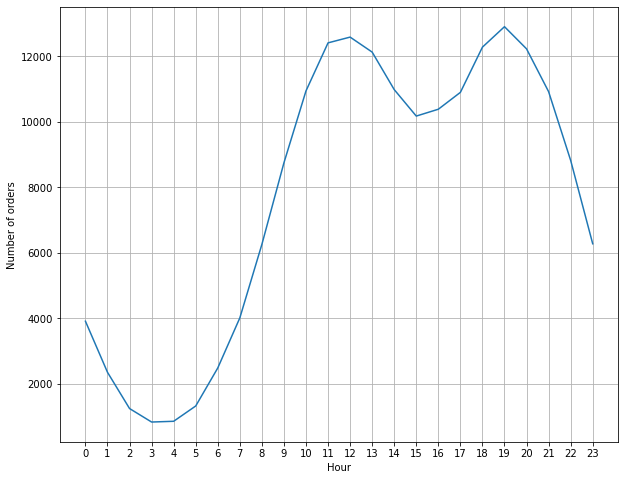

In [32]:

plt.figure(figsize = (10,8))
_ = sns.lineplot(x = by_hour["Hour"],y = by_hour["Product"])

plt.xticks(by_hour["Hour"])
plt.grid()
plt.ylabel("Number of orders")
plt.xlabel("Hour")
plt.show()

# What products are most often sold together?

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [34]:
group = all_data[all_data["Order ID"].duplicated(keep = False)]
group.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11


In [35]:
group["Grouped"] = group.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
group.head()

<ipython-input-35-b27fc71c10c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["Grouped"] = group.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [36]:
group = group[["Order ID","Grouped"]].drop_duplicates()

In [37]:
group.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [38]:
from itertools import combinations
from collections import Counter

In [39]:
count = Counter()

In [40]:
for row in group["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

In [41]:
count

Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

In [43]:
by_group = pd.DataFrame.from_dict(count,orient = "index").reset_index()
by_group.head()

,index,0
0,"(Google Phone, Wired Headphones)",414
1,"(Google Phone, USB-C Charging Cable)",987
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27
3,"(AAA Batteries (4-pack), Google Phone)",11
4,"(Lightning Charging Cable, USB-C Charging Cable)",58


In [44]:
by_group["Group"] = by_group["index"]
by_group["Times purchased"] = by_group[0]

by_group = by_group.drop(["index",0],axis = 1)

In [45]:
by_group.head()

,Group,Times purchased
0,"(Google Phone, Wired Headphones)",414
1,"(Google Phone, USB-C Charging Cable)",987
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27
3,"(AAA Batteries (4-pack), Google Phone)",11
4,"(Lightning Charging Cable, USB-C Charging Cable)",58


In [46]:
by_group.sort_values("Times purchased")

,Group,Times purchased
312,"(LG Washing Machine, AA Batteries (4-pack))",1
288,"(27in 4K Gaming Monitor, LG Dryer)",1
287,"(LG Washing Machine, Apple Airpods Headphones)",1
245,"(LG Washing Machine, Google Phone)",1
166,"(Google Phone, Vareebadd Phone)",1
...,...,...
22,"(Vareebadd Phone, USB-C Charging Cable)",361
0,"(Google Phone, Wired Headphones)",414
13,"(iPhone, Wired Headphones)",447
1,"(Google Phone, USB-C Charging Cable)",987


# What product was sold the most?

In [47]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int")

In [48]:
all_data["Quantity Ordered"]

0        2
2        1
3        1
4        1
5        1
        ..
11681    3
11682    1
11683    1
11684    1
11685    1
Name: Quantity Ordered, Length: 185950, dtype: int32

In [49]:
by_product = all_data.groupby("Product",as_index = False).sum().sort_values("Quantity Ordered")

In [50]:
by_product["Product"]

10                      LG Dryer
11            LG Washing Machine
16               Vareebadd Phone
0                   20in Monitor
14               ThinkPad Laptop
13            Macbook Pro Laptop
8                  Flatscreen TV
9                   Google Phone
3         34in Ultrawide Monitor
1         27in 4K Gaming Monitor
18                        iPhone
2               27in FHD Monitor
7     Bose SoundSport Headphones
6       Apple Airpods Headphones
17              Wired Headphones
12      Lightning Charging Cable
15          USB-C Charging Cable
4          AA Batteries (4-pack)
5         AAA Batteries (4-pack)
Name: Product, dtype: object

In [51]:
by_product["Product"] = by_product["Product"].astype(str)

In [52]:
all_data["Price Each"] = all_data["Price Each"].astype("float")

In [53]:
mean_price = all_data.groupby("Product").mean()["Price Each"]

In [54]:
mean_price

Product
20in Monitor                  109.99
27in 4K Gaming Monitor        389.99
27in FHD Monitor              149.99
34in Ultrawide Monitor        379.99
AA Batteries (4-pack)           3.84
AAA Batteries (4-pack)          2.99
Apple Airpods Headphones      150.00
Bose SoundSport Headphones     99.99
Flatscreen TV                 300.00
Google Phone                  600.00
LG Dryer                      600.00
LG Washing Machine            600.00
Lightning Charging Cable       14.95
Macbook Pro Laptop           1700.00
ThinkPad Laptop               999.99
USB-C Charging Cable           11.95
Vareebadd Phone               400.00
Wired Headphones               11.99
iPhone                        700.00
Name: Price Each, dtype: float64

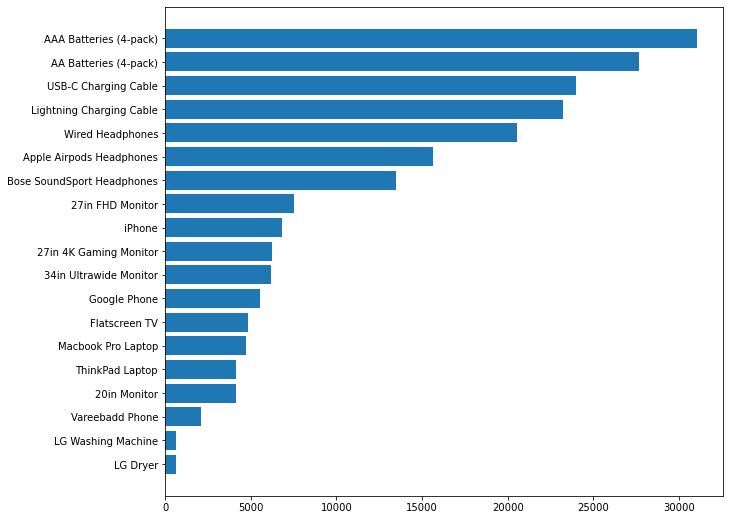

In [58]:
plt.figure(figsize = (10,9))
plt.barh(by_product["Product"],by_product["Quantity Ordered"])

plt.show()